# Introduction to Data Science 

## Final project: Data analysis for SMART CHAIR devise

Team:
1.  A.Kishkun
2.  R.Shaniiazov
3.  O.Rusanova





##  SMART CHAIR*
### Project description

Today IoT is wildly used technology. There are smart house, smart offices, smart watch and such devises become normal for our everyday life. 
Smart chair can be very good example of IoT technology convenient. It can be used in HR offices for stress resisting detection, in cybersport for understanding reactions, in clinical departments for detection physiological and psychological behavior.  






---


*The problem for Introduction to Data science project come as part of the  project for Introduction to Internet of Things (IoT) course. 

### Prototype of Smart Chair 
It consist of:
1. Simple office chair 
2. Raspberry Pi
3. Accelerometer 
4. Magnetometer

<div style="float:right;margin:0 10px 10px 0" markdown="1">
    <img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC3.jpg" width="300" height="150"/>
</div>


Data from sensor was collected and was used for people behavior estimation.


### Problem statement
Using the machine learning for people stress level classification with using data from accelerometer and magnetometer.

### Problem statement definition
Existing technology for stress level detection use contact approach for measurement, what, obviously, not the best solution for independent investigation. The using of ML can provide contactless approach for solving this kind of tasks. It will allow increasing quality of such investigation, and devises with that technology can be used in banks, restaurants, offices and hospitals etc.



#### Prototype


<div style="float:right">
    <img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC4.jpg" width="750" height="550" />
</div>



### Data collection 
Data collection is one of the main problem we faced. 

  








1) Hardware problem: everytime something happened with hardware


*  Power was broken 
*  Power connection was poor
*  The smart chair was disassembled after fast movement 

<div style="float:right;margin:0 10px 10px 0" markdown="1">
    <img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC2.jpg" width="350" height="150" />
</div>




 2) Orginazation of  stress conditions  for test persons was challenging.

 
*   scary video demonstation *
*   talking about DS course deadlines 

*videos are attached


3) Safety of Smart Chair devise: there are not many chairs in Masterskay


<div style="float:right">
    <img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/SC1.jpg" width="450" height="250" />

</div>

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings(action='ignore') #to ignore not important warnings

## Loading the data

In [2]:
df_acc_0 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer.csv')
df_acc_1 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer1.csv')
df_acc_2 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer2.csv')
df_acc_3 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/accelerometer3.csv')

df_mag_0 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer.csv')
df_mag_1 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer1.csv')
df_mag_2 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer2.csv')
df_mag_3 = pd.read_csv('https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/data/magnetometer3.csv')

df_0 = df_mag_0.join(df_acc_0[['ax', 'ay', 'az']])
df_1 = df_mag_1.join(df_acc_1[['ax', 'ay', 'az']])
df_2 = df_mag_2.join(df_acc_2[['ax', 'ay', 'az']])
df_3 = df_mag_3.join(df_acc_3[['ax', 'ay', 'az']])


## Dataset preparation

### Dropping useless columns and columns encoding

In [3]:
columns2drop = ['meta_info', 'type_sensor','id','date_created']

rename_dict = {
    'x': 'Mag_x',
    'y': 'Mag_y',
    'z': 'Mag_z',
    'ax': 'Acc_x',
    'ay': 'Acc_y',
    'az': 'Acc_z',
}

In [4]:
for df in [df_0, df_1, df_2,df_3]:
    df.drop(columns2drop, axis=1, inplace=True, errors='ignore')
    df.rename(columns=rename_dict, inplace=True)

### Making dataset

In [5]:
data = df_0.append(df_1)
data=data.append(df_2)
data=data.append(df_3)

In [6]:
data.head()

,label,people_id,Mag_x,Mag_y,Mag_z,Acc_x,Acc_y,Acc_z
0,MagLaBeL,peopleID,1288,-4376,5602,0,1568,0
1,MagLaBeL,peopleID,1246,-4383,5629,5056,704,16000
2,MagLaBeL,peopleID,1305,-4384,5607,5024,720,16000
3,MagLaBeL,peopleID,1601,-4958,5573,5088,784,16000
4,MagLaBeL,peopleID,1688,-5073,5612,5088,784,16016



### Removal of incomplete data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30359 entries, 0 to 8999
Data columns (total 8 columns):
label        30359 non-null object
people_id    29685 non-null object
Mag_x        30359 non-null int64
Mag_y        30359 non-null int64
Mag_z        30359 non-null int64
Acc_x        30359 non-null int64
Acc_y        30359 non-null int64
Acc_z        30359 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.1+ MB


In [8]:
data = data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 8999
Data columns (total 8 columns):
label        29685 non-null object
people_id    29685 non-null object
Mag_x        29685 non-null int64
Mag_y        29685 non-null int64
Mag_z        29685 non-null int64
Acc_x        29685 non-null int64
Acc_y        29685 non-null int64
Acc_z        29685 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.0+ MB



### Removal data with useless labels
For test samples marking some independent source was required.  Measurement source - Mobile Application like "Stress test" was chosen, and measure from 0 to 100 was chosen as a measurement 

In [10]:
lab = data['label'].unique()
a = (np.where(lab == '100'))[0][0]
lab1 = lab[:a]
lab2 = lab[a:]
print(lab)
print(lab2)

['MagLaBeL' 'usual sitting' 'standart sitting, sample rolling 0'
 'random moving, straight posture 0' 'just sitting, straight posture 0'
 'usual sitting 1' 'angry sitting 0' 'usual table sitting 0'
 'angry table sitting 0' 'usual table sitting 1'
 'usual nontable sitting 1' 'usual nontable sitting 2'
 'usual nontable sitting 3' 'work, talking, tired, angry'
 'work, talking, tired' '100' '87' '65' '80' '63' '0' 60 5 99 30 48]
['100' '87' '65' '80' '63' '0' 60 5 99 30 48]


In [11]:
df = data.groupby('label')
print(df.count())

                                    people_id  Mag_x  Mag_y  Mag_z  Acc_x  \
label                                                                       
5                                        1800   1800   1800   1800   1800   
30                                       1800   1800   1800   1800   1800   
48                                       1800   1800   1800   1800   1800   
60                                       1800   1800   1800   1800   1800   
99                                       1800   1800   1800   1800   1800   
0                                         900    900    900    900    900   
100                                      1800   1800   1800   1800   1800   
63                                       1800   1800   1800   1800   1800   
65                                       1800   1800   1800   1800   1800   
80                                       1800   1800   1800   1800   1800   
87                                       1800   1800   1800   1800   1800   

### Full dataset creation

In [12]:
df = pd.DataFrame()
for i in range(0, lab2.shape[0]):
  df = df.append(data[data.label ==lab2[i]])


### Encoding the labels
Labels for usefull data  are ['100' '87' '65' '80' '63' '0' 60 5 99 30 48]. But all labels should have numerical values for further classes separation

In [13]:
df.label = df.label.astype(int)

### Data separation into sets samples
For ML model each experiments have to be defined. We made 13 tests with  time duration from  1 to 3 min. 

In [14]:
uniq = df['people_id'].unique()
uniq

array(['alexey', 'nikita', 'nastya', 'oxana', 'Rost', 'noone', 'Rost2',
       'Tolya', 'oxana2', 'Alexey_1', 'Junya'], dtype=object)

In [15]:
df.shape

(18900, 8)

### Represantation of final data 

In [16]:
ex = []  #each cell is 1 experiment
for i in range(0, uniq.shape[0]):
  ex.append(df[df['people_id']==uniq[i]])
  print(str(uniq[i])+' '+str(ex[i].shape))

alexey (1800, 8)
nikita (1800, 8)
nastya (1800, 8)
oxana (1800, 8)
Rost (1800, 8)
noone (900, 8)
Rost2 (1800, 8)
Tolya (1800, 8)
oxana2 (1800, 8)
Alexey_1 (1800, 8)
Junya (1800, 8)


### Full database

In [17]:
df_label = (df.groupby('label'))
df_label.describe()

Acc_x                                                            \
        count         mean          std     min     25%     50%     75%   
label                                                                     
0       900.0  1590.471111    23.019077  1520.0  1584.0  1584.0  1600.0   
5      1800.0  2140.675556   115.667295  1792.0  2064.0  2112.0  2176.0   
30     1800.0  2655.031111    31.768813  2240.0  2640.0  2656.0  2672.0   
48     1800.0  2131.155556    56.738698     0.0  2112.0  2128.0  2144.0   
60     1800.0  2307.662222   220.152035  1888.0  2060.0  2400.0  2496.0   
63     1800.0  2012.480000    85.407779  1136.0  1968.0  2016.0  2064.0   
65     1800.0  1851.697778   270.070746 -2016.0  1840.0  1888.0  1920.0   
80     1800.0  1742.088889   167.844739   800.0  1632.0  1728.0  1856.0   
87     1800.0  2616.240000  1148.633064 -6288.0  1820.0  2352.0  3400.0   
99     1800.0  2369.271111   208.615718     0.0  2320.0  2368.0  2480.0   
100    1800.0  2342.888889   337.894196   144.0  2224.0  2432.0  2544.0   

                 Acc_y                ...      Mag_y           Mag_z  \
           max   count         mean   ...        75%     max   count   
label                                 ...                              
0       1680.0   900.0   854.364444   ...   -9134.00 -9086.0   900.0   
5       2672.0  1800.0   910.160000   ...   -7270.00 -6162.0  1800.0   
30      2800.0  1800.0   781.466667   ...   -6207.00 -5926.0  1800.0   
48      2224.0  1800.0   581.564444   ...   -5160.00 -5100.0  1800.0   
60      2720.0  1800.0   747.075556   ...   -7489.00 -5372.0  1800.0   
63      2448.0  1800.0  1198.737778   ...   -9591.00 -9198.0  1800.0   
65      3872.0  1800.0  1083.688889   ...   -5367.00 -4232.0  1800.0   
80      2736.0  1800.0   762.835556   ...   -9504.00 -6478.0  1800.0   
87     10304.0  1800.0   710.782222   ...   -6388.25 -4412.0  1800.0   
99      5296.0  1800.0   748.320000   ...   -5712.00 -4955.0  1800.0   
100     4272.0  1800.0   872.444444   ...   -8528.75 -7603.0  1800.0   

                                                                         
              mean         std     min     25%     50%      75%     max  
label                                                                    
0      3621.010000   34.732618  3511.0  3598.0  3622.5  3644.00  3716.0  
5      3451.900556   36.772630  3333.0  3428.0  3451.0  3476.00  3591.0  
30     3619.445556   33.838864  3506.0  3597.0  3620.0  3642.00  3725.0  
48     2873.100000   35.843524  2596.0  2850.0  2874.0  2899.00  2974.0  
60     3727.463333  112.856670  3411.0  3643.0  3739.5  3788.25  4054.0  
63     4024.393333   48.206624  3842.0  3991.0  4020.0  4058.00  4172.0  
65     4268.967778  109.927937  4085.0  4212.0  4238.0  4266.00  4654.0  
80     3578.770000   66.065125  3352.0  3535.0  3573.0  3612.00  3863.0  
87     4392.723333  166.141317  4139.0  4270.0  4339.0  4478.00  4854.0  
99     4266.327222   69.544177  4035.0  4211.0  4259.0  4328.00  4594.0  
100    4346.066667   57.421053  4119.0  4319.0  4351.0  4382.00  4605.0  

[11 rows x 48 columns]

The "label" clear defines the experiment. That mean "people_id" can be droped.

In [18]:
df_dr = df.drop('people_id', axis =1 )



### X  and y determination  
There were 13 experiments with different lengths. But using only 13 experiments is not good for making ML model. For increasing the number of experiments length of experiment equal 150 points are used. It is equal 126 test with 15 sec time duration.

In [19]:
X = df_dr.drop('label', axis = 1)
lab_x = X.columns
y = df_dr.label

In [20]:
print(lab_x)

Index(['Mag_x', 'Mag_y', 'Mag_z', 'Acc_x', 'Acc_y', 'Acc_z'], dtype='object')


### Increasing number of experiments

In [21]:

num_timestamp = 150

mag_x = np.array(((X.Mag_x.values.reshape((int(len(X.Mag_x)/num_timestamp),-1)))))
mag_y = np.array(((X.Mag_y.values.reshape((int(len(X.Mag_y)/num_timestamp),-1)))))
mag_z =np.array ((X.Mag_z.values.reshape((int(len(X.Mag_z)/num_timestamp),-1))))
acc_x =np.array ((X.Acc_x.values.reshape((int(len(X.Acc_x)/num_timestamp),-1))))
acc_y = np.array((X.Acc_y.values.reshape((int(len(X.Acc_y)/num_timestamp),-1))))
acc_z =np.array ((X.Acc_z.values.reshape((int(len(X.Acc_z)/num_timestamp),-1))))

In [22]:
columns_series = ["Acc_x_{}".format(i) for i in range(acc_x.shape[1])]

X_assembled = pd.DataFrame(data=acc_x, columns=columns_series).join(
    pd.DataFrame(data=acc_y, columns=["Acc_y_{}".format(i) for i in range(acc_y.shape[1])])
    ).join(pd.DataFrame(data=acc_z, columns=["Acc_z_{}".format(i) for i in range(acc_z.shape[1])])
    ).join(pd.DataFrame(data=mag_x, columns=["Mag_x_{}".format(i) for i in range(mag_x.shape[1])])
    ).join(pd.DataFrame(data=mag_y, columns=["Mag_y_{}".format(i) for i in range(mag_y.shape[1])])
    ).join(pd.DataFrame(data=mag_z, columns=["Mag_z_{}".format(i) for i in range(mag_z.shape[1])]))
X_assembled.shape

(126, 900)

In [23]:
X_assembled.head()

,Acc_x_0,Acc_x_1,Acc_x_2,Acc_x_3,Acc_x_4,Acc_x_5,Acc_x_6,Acc_x_7,Acc_x_8,Acc_x_9,...,Mag_z_140,Mag_z_141,Mag_z_142,Mag_z_143,Mag_z_144,Mag_z_145,Mag_z_146,Mag_z_147,Mag_z_148,Mag_z_149
0,2384,2464,2448,2448,2400,2432,2432,2400,2416,2432,...,4323,4329,4323,4353,4329,4605,4322,4327,4293,4353
1,2192,2400,2288,2320,2336,2496,2432,2592,2352,2448,...,4387,4362,4359,4342,4362,4310,4382,4400,4351,4322
2,2512,2592,2560,2576,2544,2624,2672,2592,2672,2560,...,4374,4421,4329,4386,4367,4379,4139,4327,4396,4387
3,2528,2656,2640,2768,2704,2736,2592,2816,2496,2800,...,4369,4348,4322,4329,4368,4321,4347,4348,4364,4329
4,2560,2592,2672,2736,2800,2912,2896,2736,3072,3120,...,4363,4353,4353,4347,4333,4335,4341,4323,4349,4371


### Normalisation for  scaling the data

In [24]:
from sklearn.preprocessing import minmax_scale
X_ass_norm =minmax_scale(X_assembled, copy=True, feature_range=(0, 1))
tmp = X_assembled.columns
X_ass_norm = pd.DataFrame(X_ass_norm)
X_ass_norm.columns=tmp
X_ass_norm.describe()

,Acc_x_0,Acc_x_1,Acc_x_2,Acc_x_3,Acc_x_4,Acc_x_5,Acc_x_6,Acc_x_7,Acc_x_8,Acc_x_9,...,Mag_z_140,Mag_z_141,Mag_z_142,Mag_z_143,Mag_z_144,Mag_z_145,Mag_z_146,Mag_z_147,Mag_z_148,Mag_z_149
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.471816,0.343313,0.349751,0.310503,0.453949,0.335361,0.324276,0.342888,0.247904,0.285604,...,0.515784,0.550361,0.532142,0.544456,0.562082,0.558427,0.564179,0.560756,0.560977,0.531684
std,0.124509,0.131044,0.131791,0.136224,0.124894,0.142664,0.131444,0.128932,0.164051,0.149935,...,0.239370,0.239462,0.239891,0.243025,0.263244,0.260043,0.254443,0.254727,0.251730,0.245054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.422261,0.271097,0.275751,0.234043,0.386089,0.262115,0.250980,0.269231,0.155128,0.200231,...,0.380341,0.403308,0.391238,0.410510,0.410039,0.406773,0.412603,0.404206,0.409951,0.394261
50%,0.466431,0.329114,0.330472,0.293617,0.439516,0.321586,0.309804,0.319231,0.217949,0.259259,...,0.479908,0.526209,0.501528,0.502341,0.514100,0.514493,0.517534,0.522540,0.515955,0.499476
75%,0.540636,0.413502,0.416309,0.382979,0.523185,0.417401,0.388235,0.413462,0.332051,0.361111,...,0.722152,0.766412,0.745160,0.757544,0.801607,0.786929,0.797534,0.785184,0.787317,0.746593
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### New features generation

There are too many columns for learning. In this case relation between result quality and computational power is irrational. It's better to generate new features. One way to do it is to extract physically logical features from person behavior.


In [25]:
coord_names = list(rename_dict.values())
mask_noone = df['people_id'] == 'noone'
df_noone = df.loc[mask_noone, :]

means_noone = df_noone.loc[:, coord_names].mean(axis=0)
stds_noone = df_noone.loc[:, coord_names].std(axis=0)

means_noone.name = 'mean'
stds_noone.name = 'std'

means_stds = pd.DataFrame([means_noone, stds_noone]).T

Movement time  calculation along Z axis( swing on chair)

In [26]:
def get_lean_back_portion(acc_z, means_stds=means_stds, n_sigma=5):
    acc_z_mean = means_stds.loc['Acc_z', 'mean']
    acc_z_std = means_stds.loc['Acc_z', 'std']
    
    acc_z_min = acc_z_mean - n_sigma * acc_z_std
    acc_z_max = acc_z_mean + n_sigma * acc_z_std
    
    lean_back_portion = (acc_z < acc_z_min).mean()
    return lean_back_portion

Movement time calculation along X and Y axis( twisting  on chair)
Limitation values are established and used for movement detection. 

In [27]:

def get_mess_mask_acc(acc_data, percentile2crop=10, n_sigma=10):
    lower_bound, upper_bound, median = np.percentile(acc_data, [percentile2crop, 100 - percentile2crop, 50])
    acc_data_filtered = acc_data[(lower_bound < acc_data) & (acc_data < upper_bound)]
    std = np.std(acc_data_filtered)
    oscillation = std / (25 * n_sigma)
    calm_state_lower_bound = median - n_sigma * std
    calm_state_upper_bound = median + n_sigma * std
    mask_calm = ((calm_state_lower_bound < acc_data) & (acc_data < calm_state_upper_bound))
    return mask_calm, oscillation



In [28]:
sensor_data_colnames = ['Acc_x', 'Acc_y', 'Acc_z', 'Mag_x', 'Mag_y', 'Mag_z']
X_ass_add = X_assembled.copy()
X_ass_add = X_ass_add.drop(sensor_data_colnames, axis=1, errors='ignore')

for sensor_colname in sensor_data_colnames:
  columns2parse = [colname for colname in X_ass_add.columns if colname.startswith(sensor_colname)]
  X_ass_add[sensor_colname] = None

  for index in X_ass_add.index:
    X_ass_add[sensor_colname][index] = (X_ass_add.loc[index, columns2parse].values)

In [29]:
from scipy.interpolate import splrep, splev

In [30]:
def get_mess_mask_mag(mag_data, w=0.05, max_calm_derivative=30):
    # Spline approximation
    y = mag_data
    x = np.arange(len(y))
    splines = splrep(x, y, w=w * np.ones_like(y))
    points = splev(x, splines, der=0)
    derivatives = splev(x, splines, der=1)
    
    mask_calm = abs(derivatives) < max_calm_derivative
    
#     return points, derivatives
    return mask_calm

In [31]:
X_ass_add['Momentum'] = None
X_ass_add['Oscillations'] = None
X_ass_add['Rotational movement'] = None
X_ass_add['Lean back'] = None

for index in X_ass_add.index:
  mask_calm_acc_x, oscillation_acc_x = get_mess_mask_acc(X_ass_add['Acc_x'][index])
  mask_calm_acc_y, oscillation_acc_y = get_mess_mask_acc(X_ass_add['Acc_y'][index])
  mask_calm_acc_z, oscillation_acc_z = get_mess_mask_acc(X_ass_add['Acc_z'][index])

  mess_portion_acc_x = 1 - mask_calm_acc_x.mean()
  mess_portion_acc_y = 1 - mask_calm_acc_y.mean()
  mess_portion_acc_z = 1 - mask_calm_acc_z.mean()

  mess_portion_acc = (oscillation_acc_x + oscillation_acc_y + oscillation_acc_z) / 3

  mask_calm_acc = mask_calm_acc_x & mask_calm_acc_y & mask_calm_acc_z
  mess_portion_acc = 1 - mask_calm_acc.mean()
  
  mask_calm_mag_x = get_mess_mask_mag(X_ass_add['Mag_x'][index])
  mask_calm_mag_y = get_mess_mask_mag(X_ass_add['Mag_y'][index])
  mask_calm_mag_z = get_mess_mask_mag(X_ass_add['Mag_z'][index])

  mess_portion_mag_x = 1 - mask_calm_mag_x.mean()
  mess_portion_mag_y = 1 - mask_calm_mag_y.mean()
  mess_portion_mag_z = 1 - mask_calm_mag_z.mean()

  mask_calm_mag = mask_calm_mag_x & mask_calm_mag_y & mask_calm_mag_z
  mess_portion_mag = 1 - mask_calm_mag.mean()
  
  X_ass_add['Lean back'][index] = get_lean_back_portion(X_ass_add['Acc_z'][index])
  X_ass_add['Momentum'][index] = mess_portion_acc
  X_ass_add['Oscillations'][index] = oscillation_acc_z
  X_ass_add['Rotational movement'][index] = mess_portion_mag

### Generated feature

In [32]:
df_features = X_ass_add[['Lean back', 'Momentum', 'Rotational movement','Oscillations']]
X_ass_add = X_ass_add.drop(['Acc_x', 'Acc_y', 'Acc_z', 'Mag_x', 'Mag_y', 'Mag_z'], axis = 1)

In [33]:
df_features.head()

,Lean back,Momentum,Rotational movement,Oscillations
0,0.08,0,0.0933333,0.0777618
1,0.193333,0,0.0733333,0.133965
2,0.273333,0.02,0.186667,0.179571
3,0.36,0,0.0333333,0.274186
4,0.16,0,0.293333,0.118661


### Making y, which is equal to 126 experiments.


In [34]:
y_new = []
for i in range(0, int(y.shape[0]/num_timestamp)):
  y_new.append(int((y[i*num_timestamp:(i+1)*num_timestamp].unique()[0])))
y_new = np.array(y_new) 
y_new = y_new.reshape(-1,1)
#y_new

In [35]:
y_new_clean = y_new.copy()

### Let's prepare experiments for binary classification and have a look at stress level distribution in dataset

In [36]:
from sklearn.preprocessing import Binarizer
def threshbin(threshold, y ):
    binar = Binarizer(copy=True, threshold=threshold).fit(y) # copy to new target 
    return binar.transform(y)

In [37]:
y_new_4 = y_new/100
y_new_4
y_new_4 = pd.DataFrame(threshbin(0.64, y_new_4))
print(y_new_4[y_new_4==0].count())
print(y_new_4[y_new_4==1].count())



0    66
dtype: int64
0    60
dtype: int64


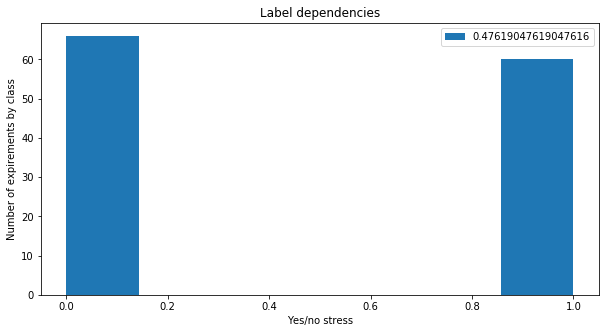

In [38]:
plt.figure(figsize=(10,5))
plt.hist(y_new_4.values, bins = 7); #We added 7 bins to clearly see that there are only 0 and 1 labels. 
plt.title('Label dependencies')
plt.xlabel('Yes/no stress')
plt.ylabel('Number of expirements by class')
plt.legend(y_new_4.mean())

### Let's prepare our data for multilabel classification and have a look at stress level distribution in dataset

In [39]:
y_new_multi = y_new.copy()

for i in range(0, y_new_multi.shape[0]):
  if (y_new_multi[i]<=25):
    y_new_multi[i] = 0
  elif(y_new_multi[i]<=50): 
    y_new_multi[i] = 1
  elif(y_new_multi[i]<=75): 
    y_new_multi[i] = 2
  else:
    y_new_multi[i]=3

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_new_multi_4 = (mlb.fit_transform(y_new_multi))


Text(0, 0.5, 'Number of expirements by class')

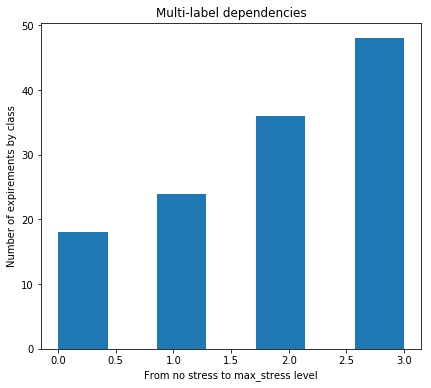

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
plt.hist(y_new_multi, bins = 7); #We added 7 bins to clearly see that there are only 0 and 1 labels. 
plt.title('Multi-label dependencies')
plt.xlabel('From no stress to max_stress level')
plt.ylabel('Number of expirements by class')

# Visualization

### Visualization of two conditions

 
1.   Normal  person condition dataset
2.   Stress person condition dataset for the same person 



KeyError: '[   0    1    2 ... 1797 1798 1799] not in index'

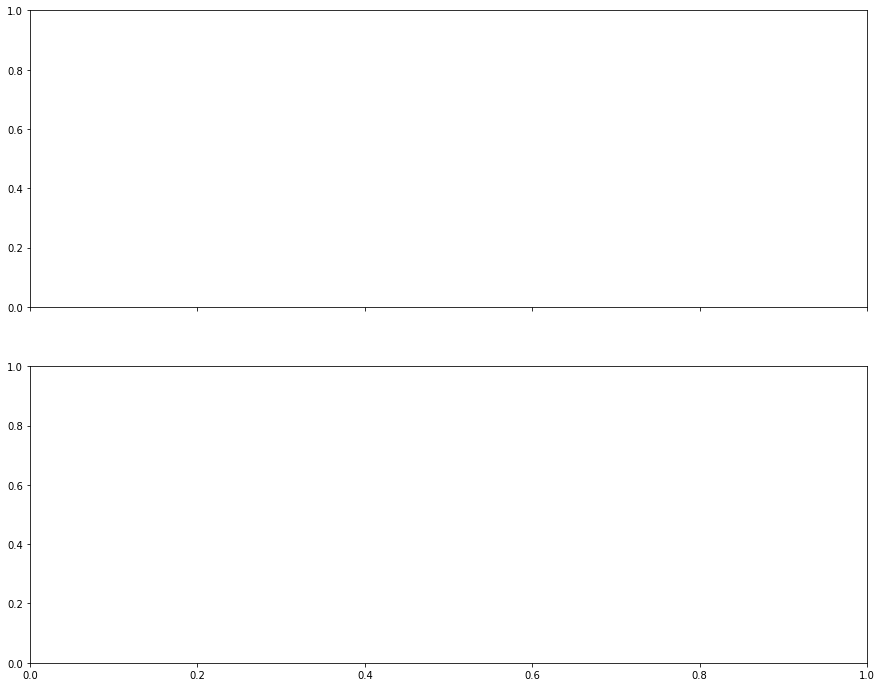

In [42]:
 _, ax = plt.subplots(2, sharex=True, figsize=(15,12))
  

df[df.people_id == 'Rost2'].plot(ax=ax[0], title='Rostic in stress',
                            x=np.array(range(df[df.people_id == 'Rost2'].shape[0])),
                            y=df.columns.drop('Mag_z', 'label'))
df[df.people_id == 'Rost'].plot(ax=ax[1], title='Person in normal condition', 
                          x=np.array(range(df[df.people_id == 'Rost'].shape[0])),
                          y=df.columns.drop('Mag_z', 'label'))

<img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/output_18_2.png" width="550" height="350" />

### Visualization of  four conditions

 





In [ ]:

_, axs = plt.subplots(6, sharex=True, figsize=(15,25))
labels = ['Acc_x', 'Acc_y', 'Acc_z', 'Mag_x', 'Mag_y', 'Mag_z']
arr_nervous = X_ass_norm.values[np.where(y_new_multi == 3)[0][0]]
arr_class2 = X_ass_norm.values[np.where(y_new_multi == 2)[0][0]]
arr_class1 = X_ass_norm.values[np.where(y_new_multi == 1)[0][0]]
arr_patient = X_ass_norm.values[np.where(y_new_multi == 0)[0][0]]

for i in range(axs.shape[0]):
  axs[i].plot(arr_nervous[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))], "r-", label='Person in stress')
  axs[i].plot(arr_class2[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))], "b-", label='Person in class 2')
  axs[i].plot(arr_class1[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))],"y-", label='Person in class 1')
  axs[i].plot(arr_patient[np.array(range(num_timestamp * i, num_timestamp * (i + 1)))], "g-", label='Person in normal condition')
  axs[i].set_title(labels[i])
  
  axs[i].legend()
  

Data from magnetometer
<img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/m.PNG" width="650" height="350" />

Data from accelerometer
<img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/as.PNG" width="750" height="600" />

### Visualisation of data relations

In [ ]:
data_assembled = df.copy()
data_assembled.label[(data_assembled.label>= 0) & (data_assembled.label <= 25)] = 0
data_assembled.label[(data_assembled.label> 25) & (data_assembled.label <= 50)] = 1
data_assembled.label[(data_assembled.label> 50) & (data_assembled.label <= 75)] = 2
data_assembled.label[(data_assembled.label> 75) & (data_assembled.label <= 100)] = 3

In [ ]:
data_assembled.columns

In [ ]:

sns.pairplot(data_assembled.drop(["people_id"]), hue='label')


sns.pairplot(data_assembled.drop(["people_id"]), hue='label')

<img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/output_24_1.png" width="650" height="350" />


In [ ]:
def plot_measurements_scatter(
    df2analyse,
    means_stds=None,
    sensors_list=['Mag', 'Acc'],
    coords_list = [['x', 'y'], ['x', 'z'], ['y', 'z']],
    n_stds = 5
):    
    fig, ax = plt.subplots(len(sensors_list), len(coords_list))
    fig.set_figheight(10)
    fig.set_figwidth(20)

    for n_row, sensor_type in enumerate(sensors_list):
        for n_col, coord_names in enumerate(coords_list):
            coord_name_1 = sensor_type + '_' + coord_names[0]
            coord_name_2 = sensor_type + '_' + coord_names[1]

            first_coord_data = df2analyse[coord_name_1].values
            second_coord_data = df2analyse[coord_name_2].values

            ax[n_row, n_col].scatter(first_coord_data, second_coord_data, alpha=0.2, s=7)
            if means_stds is not None:
              errors_ellipse = Ellipse(
                  xy=means_stds.loc[[coord_name_1, coord_name_2], 'mean'].values,
                  width=n_stds*means_stds.loc[coord_name_1, 'std'],
                  height=n_stds*means_stds.loc[coord_name_2, 'std'],
                  alpha=0.3,
                  color='green',
              )
              ax[n_row, n_col].add_artist(errors_ellipse)
            
            title = sensor_type + ' ' + ', '.join(coord_names)
            ax[n_row, n_col].set_title(title)

### Visualisation of data distribution

In [ ]:
mask = (df.label == 100)# & (df_2['label'] == 'work, talking, tired, angry')
df2analyse = df.loc[mask, :]

plot_measurements_scatter(df2analyse)

<img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/output_26_0.png" width="850" height="550" />


# Classifier

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #to ignore not important warnings

In [ ]:
def validation_mine(clf, X, y, print_F = True, return_pred = False, cv=None):
    if cv is None:
      kfold = KFold(n_splits=5, shuffle=True, random_state=24) # 5-fold CV
      cv = kfold.split(X, y) #  make the split
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
    y_pred = cross_val_predict(clf, X, y)
    if print_F:
        print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )
        print(classification_report(y, y_pred))
    if return_pred:
        return scores, y_pred
    else:
        return scores

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePGroupsOut

def custom_cross_validate(clf, X, y, print_F = True, return_pred = False, cv=None):
  if cv is None:
      kfold = KFold(n_splits=5, shuffle=True, random_state=24) # 5-fold CV
      cv = kfold.split(X, y) #  make the split
  scoring = ['accuracy', 'f1', 'precision', 'recall']
  scores = cross_validate(clf, X, y, scoring=scoring, cv=cv)
  y_pred = cross_val_predict(clf, X, y)
  if print_F:
      print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )
      print(classification_report(y, y_pred))
  if return_pred:
      return scores, y_pred
  else:
      return scores
  

In [ ]:
print(custom_cross_validate(LogisticRegression(), X_ass_norm, y_new_4, print_F=False))

### For understanding quality of working LogisticRegression let's learn on every X data, and try to analyze the result

*   X_ass_norm- normalized data without new features
*   X _assembled - non normalized data without new features
*   X_ass_add - non normalized data with new feature
*   X_ass_add_norm - normalized data with new features



In [ ]:
X_ass_add_norm =minmax_scale(X_ass_add, copy=True, feature_range=(0, 1))

In [ ]:
print(validation_mine(LogisticRegression(), X_ass_norm, y_new_4))
print(validation_mine(LogisticRegression(), X_ass_add, y_new_4))


In [ ]:
print(validation_mine(LogisticRegression(), df_features, y_new_4))
print(validation_mine(LogisticRegression(), X_assembled, y_new_4))


In [ ]:
print(validation_mine(LogisticRegression(), X_ass_add_norm, y_new_4))

Results: New features work not very good. But normalisation looks promising


### Using normalized data with new features



In [ ]:
X_c = X_ass_add
y_new_clean
X_c = X_c.assign(Target =y_new_clean)
X_c =minmax_scale(X_c, copy=True, feature_range=(0, 1))

In [ ]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ass_norm, y_new_4, test_size = 0.5, random_state =42)
clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
y_predicted = clf.predict(X_train) 
print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
y_predicted = clf.predict(X_test) 
print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))

Выглялит круто, но это не корректно. Давайте все-таки реализуем Leave one out

In [ ]:
import random
import numpy as np 
def live_one_out(X,y,y_label, n_people=1, ifrand = False, shuffle=True):
  
  labels = (np.unique(y))
  
  indxs = None
  for i in range(n_people):
    a = random.randint(0, labels.shape[0] - 1)
    if indxs is not None:
      indxs = np.concatenate([np.where(y == labels[a])[0], indxs])
    else:
      indxs = np.where(y == labels[a])[0]
  y_test = np.zeros((indxs.shape[0] ,y_label.shape[1]))
  X_test = np.zeros((indxs.shape[0] ,X.shape[1]))

  for i in range(0, indxs.shape[0]):
    y_test[i, :] = y_label[indxs[i], :]
    X_test[i, :] = X[indxs[i], :]
  
    
  if shuffle:
    p = np.random.permutation(X_test.shape[0])
  else:
    p = np.array(range(X_test.shape[0]))
  X_test = X_test[p, :]; 
  y_test = y_test[p, :];
  
  mask = np.ones(len(X), dtype=bool)
  for i in range(0, X.shape[0]):
    for j in range(0, indxs.shape[0]):
      if i == indxs[j]:
        mask[i]= 0
  X_train = np.array((X[mask,...]))
  for i in range(0, y.shape[0]):
    for j in range(0, indxs.shape[0]):
      if i == indxs[j]:
        mask[i]= 0
  y_train = np.array((y_label[mask,...]))
  
  if shuffle:
    p = np.random.permutation(X_train.shape[0])
  else:
    p = np.array(range(X_train.shape[0]))
  X_train = X_train[p, :]; 
  y_train = y_train[p, :];
  return y_test, X_test, X_train, y_train

y_test, X_test, X_train, y_train = live_one_out(X_ass_add_norm, y_new_clean, y_new_4.values, shuffle=True, n_people=1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

In [ ]:
for i in range(5):
  y_test, X_test, X_train, y_train = live_one_out(X_ass_add_norm, y_new_clean,y_new_multi_4, n_people=1, shuffle=True)
  clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
  y_predicted = clf.predict(X_train) 
  print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
  y_predicted = clf.predict(X_test) 
  print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))

В некоторых ситуациях, получаем точность 0, а на некоторых значениях точность = 1. Это может говорить о том, что некоторые классы очень похожи друг на друга. 

In [ ]:
for i in range(5):
  y_test, X_test, X_train, y_train = live_one_out(X_ass_add_norm, y_new_multi,y_new_multi, n_people=1, shuffle=True)
  clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
  y_predicted = clf.predict(X_train) 
  print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
  y_predicted = clf.predict(X_test) 
  print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut

In [ ]:
logo = LeaveOneOut()
uniq_columns = np.unique(y_new_clean)
groups = y_new_clean.copy()
acc_train = []
acc_test = []
for i in range(uniq_columns.shape[0]):
  groups[y_new_clean == uniq_columns[i]] = i
clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
for train_index, test_index in logo.split(X_ass_add_norm, y_new_multi_4, groups):
  X_train, X_test = X_ass_add_norm[train_index], X_ass_add_norm[test_index]
  y_train, y_test = y_new_multi_4[train_index], y_new_multi_4[test_index]
  y_predicted = clf.predict(X_train) 
#  print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
  acc_train.append(accuracy_score(y_train, y_predicted))
  y_predicted = clf.predict(X_test) 
#  print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
  acc_test.append(accuracy_score(y_test, y_predicted))
print('Accuracy of train is {}+-{}'.format(np.mean(acc_train), np.std(acc_train)))
print('Accuracy of test is {}+-{}'.format(np.mean(acc_test), np.std(acc_test)))



### Grid search

In [ ]:
# build a classifier
from scipy.stats import randint as sp_randint
from time import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=36)

In [ ]:
#Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

def do_grid_search(X, y ,arr_clf, arr_params,n_iter_search = 20):
  # specify parameters and distributions to sample from
  for i in range(arr_clf.__len__()):
    param_dist = arr_params[i]
    clf = arr_clf[i]

    # run randomized search

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5)

    start = time()
    random_search.fit(X, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(random_search.cv_results_)

In [ ]:

do_grid_search(X_ass_add_norm, y_new_multi_4,[RandomForestClassifier(n_estimators=36)], 
               [{"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}])


The best parameters for RandomForestClassifier are bootstrap: False, criterion: entropy, max_depth: None, max_features: 9, min_samples_split: 6

In [ ]:
import sklearn.metrics
from itertools import cycle
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from scipy import interp
from sklearn.model_selection import GridSearchCV

def roc_curve_m(X, y, printF = True, returnF = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state =42)
    clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
    probs = clf.predict_proba(X_test) 
    y_predicted = clf.predict(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    if (printF):
        print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))
        print(confusion_matrix(y_test, y_predicted))
    if (returnF):
        score = accuracy_score(y_test, y_predicted)
        return fpr, tpr, roc_auc, score
      

In [ ]:

fpr, tpr, roc_auc, score = roc_curve_m(X_ass_add_norm, y_new_4, returnF=True, printF=False)
plt.plot(fpr, tpr, label = ' '+'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We can see in this graph that we obtain a very good ROC curve.  

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
scores = []
AUC = [] 
for i in range(0, y_new_multi_4.shape[1]):
    fpr, tpr, roc_auc, score = roc_curve_m(X_ass_add_norm, y_new_multi_4[:,i], returnF=True, printF=False)
    scores.append(score)
    AUC.append(roc_auc)
    plt.plot(fpr, tpr, label = str(i)+' '+'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Conclusion
The model successfully solved the standed problem. However, we understand thar recieved quality is not so good. We have very low number of data and very fast overfitting. Leave one out is partly solve the problem but anyway we recieve the too good results: 0.968+-0.17
However, I believe that our suggested approach is applicable for our problem statement. The neccessary improvement is collecting more data. Our results is also could be implemented as a web-application

## Future plan
More experiments

More sensors (e.g. gyroscope for perception)

Web-interface for personalized results

<div> 
<img src="https://raw.github.com/Kichkun/smart_chair/master/Data_Analysis/pic/4-Levels-of-Stress-584x360.jpg" height="50" /> 
</div>